In [ ]:
!pip install pyproj
import pyproj
import folium
import pandas as pd
import math
from math import sqrt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
csv_path = '/content/drive/MyDrive/IAAC_Y2/AI_URBANISM/AI_URB_2/final_tuesday-app/Copy of karim_beirut.csv'
poi_data = pd.read_csv(csv_path)
print(poi_data)

                                           Image Url          X          Y  \
0  https://raw.githubusercontent.com/KarimAbillam...  35.475981  33.896326   
1  https://raw.githubusercontent.com/KarimAbillam...  35.513558  33.892036   
2  https://raw.githubusercontent.com/KarimAbillam...  35.500685  33.893476   
3  https://raw.githubusercontent.com/KarimAbillam...  35.529339  33.887809   
4  https://raw.githubusercontent.com/KarimAbillam...  35.526101  33.887840   
5  https://raw.githubusercontent.com/KarimAbillam...  35.524130  33.892120   
6  https://raw.githubusercontent.com/KarimAbillam...  35.499275  33.887628   

   PLOT AREA  Resort  Playground  NGO  Government  Diplomatic  Coworking  ...  \
0      31878       0           1    3           1           1          1  ...   
1      30750       0           0    0           2           1          0  ...   
2         56       0           0    0           1           8          0  ...   
3      17484       0           0    0           3  

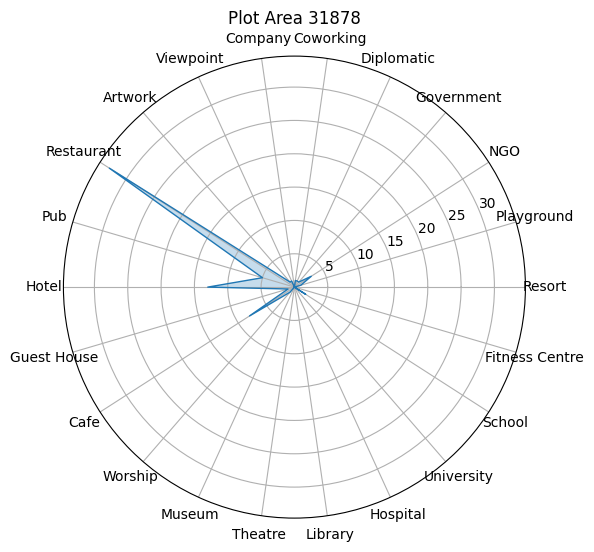

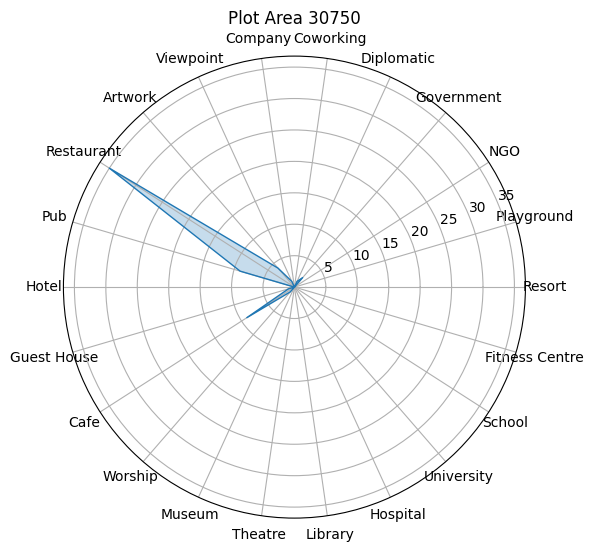

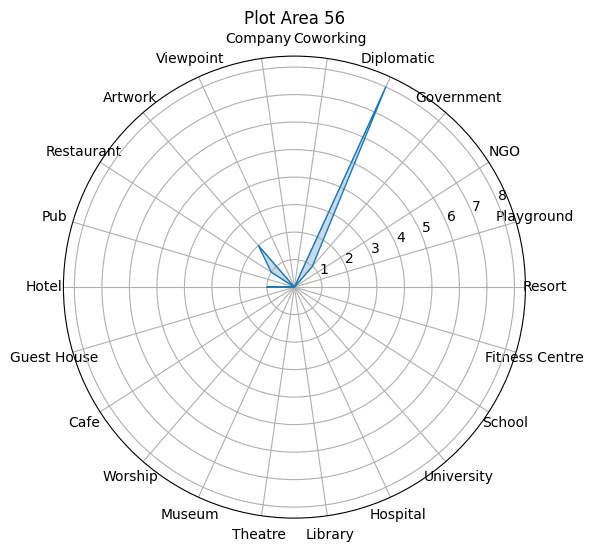

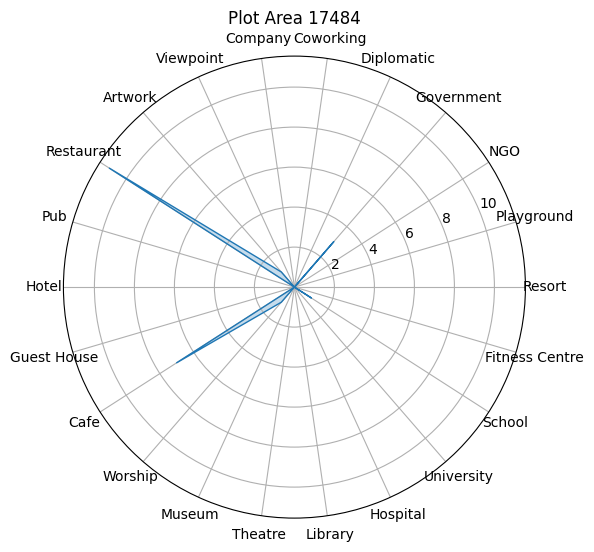

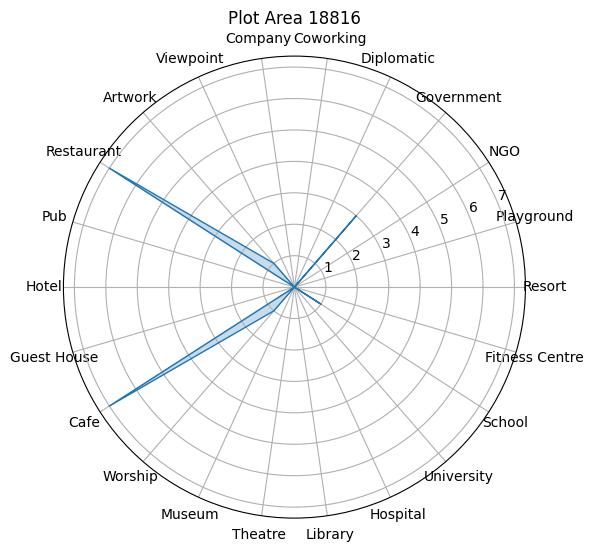

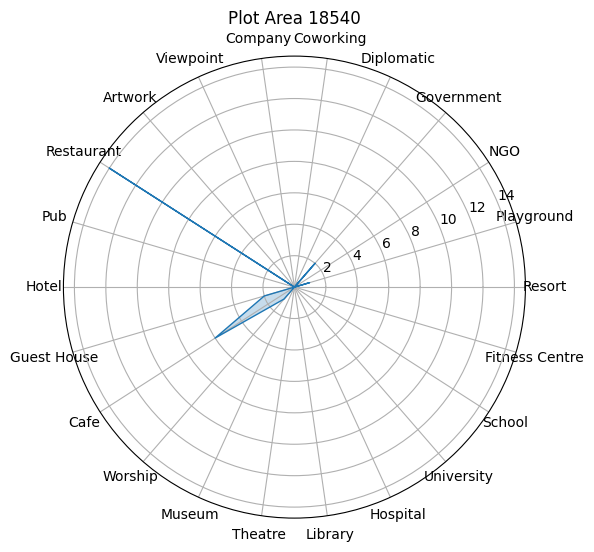

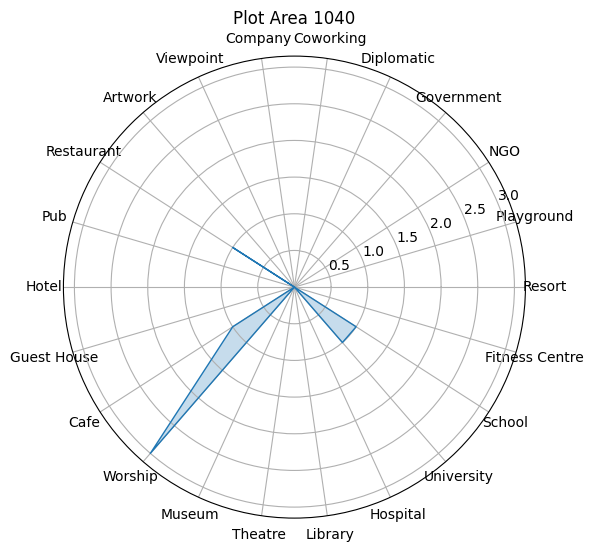

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the columns for the radar chart
columns = ['Resort', 'Playground', 'NGO', 'Government', 'Diplomatic', 'Coworking', 'Company', 'Viewpoint', 'Artwork', 'Restaurant', 'Pub', 'Hotel', 'Guest House', 'Cafe', 'Worship', 'Museum', 'Theatre', 'Library', 'Hospital', 'University', 'School', 'Fitness Centre']

# Iterate over each row in the DataFrame
for i, row in poi_data.iterrows():
    values = row[columns].values.astype(float)
    categories = columns

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Set the angles and offset for the radar chart
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Close the plot by repeating the first angle
    values = np.concatenate((values, [values[0]]))  # Close the plot by repeating the first value

    # Plot the radar chart
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

    # Set the labels for each category
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Set the title for the radar chart
    ax.set_title(f"Plot Area {row['PLOT AREA']}")

    # Display the radar chart
    plt.show()


In [ ]:
# Define a dictionary mapping the cluster ID values to their corresponding labels
label_mapping = {
    9: 'Leisure hub',
    8: 'Artistic and Touristic hub',
    5: 'Civic artist hub',
    4: 'Active hub',
    3: 'Unity district',
    1: 'Recreation hub'
}

# Replace the cluster ID values with the corresponding labels
poi_data['clusterID'] = poi_data['clusterID'].replace(label_mapping)

print(poi_data)


                                           Image Url          X          Y  \
0  https://raw.githubusercontent.com/KarimAbillam...  35.475981  33.896326   
1  https://raw.githubusercontent.com/KarimAbillam...  35.513558  33.892036   
2  https://raw.githubusercontent.com/KarimAbillam...  35.500685  33.893476   
3  https://raw.githubusercontent.com/KarimAbillam...  35.529339  33.887809   
4  https://raw.githubusercontent.com/KarimAbillam...  35.526101  33.887840   
5  https://raw.githubusercontent.com/KarimAbillam...  35.524130  33.892120   
6  https://raw.githubusercontent.com/KarimAbillam...  35.499275  33.887628   

   PLOT AREA  Resort  Playground  NGO  Government  Diplomatic  Coworking  ...  \
0      31878       0           1    3           1           1          1  ...   
1      30750       0           0    0           2           1          0  ...   
2         56       0           0    0           1           8          0  ...   
3      17484       0           0    0           3  

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import io
# import base64

# # Define the interventions for each Cluster ID
# interventions = {
#     'leisure hub': ['Public Recreation', 'Pocket Park', 'Food Truck'],
#     'artistic and touristic hub': ['Public Park', 'Urban Farming', 'Theatre and Cultural Events', 'Seasonal Market', 'Artisanal Workshops'],
#     'civic artist hub': ['Urban Farming', 'Artisan Workshop', 'Music Performance', 'Workshop', 'Comfortable Gathering Green Space'],
#     'Active hub': ['Farming', 'Art Exhibition', 'Weekend Market', 'Live Music Performance'],
#     'unity district': ['Urban Garden', 'Urban Farming', 'Entertainment Space', 'Outdoor Gym'],
#     'recreation hub': ['Mobile Food Trucks', 'Pop-up Events', 'Art Installation']
# }

# benefits = {
#     'Public Recreation': 'Improved community well-being and social interaction.',
#     'Pocket Park': 'Enhanced green space and relaxation area.',
#     'Food Truck': 'Increased food options and cultural experiences.',
#     'Public Park': 'Access to nature and recreational activities.',
#     'Urban Farming': 'Fresh food production and educational opportunities.',
#     'Theatre and Cultural Events': 'Promotion of arts and cultural experiences.',
#     'Seasonal Market': 'Support for local businesses and farmers.',
#     'Artisanal Workshops': 'Opportunities for skill development and creativity.',
#     'Artisan Workshop': 'Space for artisans to create and showcase their work.',
#     'Music Performance': 'Live music entertainment and cultural expression.',
#     'Workshop': 'Hands-on learning and knowledge sharing.',
#     'Comfortable Gathering Green Space': 'Inviting area for community gatherings.',
#     'Farming': 'Opportunities for agricultural production and education.',
#     'Art Exhibition': 'Display of art and creative expression.',
#     'Weekend Market': 'Platform for local vendors and entrepreneurship.',
#     'Live Music Performance': 'Enlivening atmosphere with live music performances.',
#     'Urban Garden': 'Green space for gardening and community engagement.',
#     'Entertainment Space': 'Venue for various recreational activities and events.',
#     'Outdoor Gym': 'Fitness facilities in an open-air setting.',
#     'Mobile Food Trucks': 'Diverse food options and culinary experiences.',
#     'Pop-up Events': 'Temporary events and unique experiences.',
#     'Art Installation': 'Visual art displays and interactive installations.'
# }

# spots_locations = poi_data[['Y', 'X', 'clusterID', 'Image Url']]

# map = folium.Map(
#     location=[33.8938, 35.5018],
#     zoom_start=13,
#     control_scale=True
# )

# # Add the cartodbdark_matter tile layer to the map
# folium.TileLayer('cartodbdark_matter').add_to(map)

# # Iterate over each row in the DataFrame
# for index, location_info in poi_data.iterrows():
#     cluster_id = location_info['clusterID']
#     interventions_list = interventions.get(cluster_id.lower(), [])
#     intervention_options_html = ''.join([f"<input type='radio' name='intervention_{index}' value='{intervention}' onclick='showContent(this, {index})'>{intervention}<br>" for intervention in interventions_list])

#     # Generate the radar chart
#     values = poi_data.loc[index, columns].values.astype(float)
#     categories = columns

#     fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
#     angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
#     values = np.concatenate((values, [values[0]]))
#     angles += angles[:1]
#     ax.plot(angles, values, color='purple', linewidth=2)
#     ax.fill(angles, values, color='purple', alpha=0.25)
#     ax.set_xticks(angles[:-1])
#     ax.set_xticklabels(categories, fontsize=6)
#     ax.set_yticks([1, 2, 3, 4, 5])
#     ax.set_yticklabels(["1", "2", "3", "4", "5"], color="grey", fontsize=8)
#     ax.set_ylim(0, 5)
#     ax.set_title(f'Cluster ID: {cluster_id}', size=12, color='black', y=1.1)
#     ax.grid(True)

#     # Save the chart image to a buffer
#     buffer = io.BytesIO()
#     plt.savefig(buffer, format='png', dpi=80)
#     buffer.seek(0)
#     image_data = base64.b64encode(buffer.getvalue()).decode()

#     # Generate the HTML for the popup
#     html = f"""
#      {css}
#     <img src="{location_info['Image Url']}" alt="Image" width="350px">
#     <b>Interventions:</b><br>
#     {intervention_options_html}
#     <br>
#     <img src="data:image/png;base64,{image_data}" alt="Radar Chart">
#     <br>
#     <div id="activation_proposal_{index}" style="visibility: hidden">
#         <b class="popup-title">Activation Proposal:</b>
#         <p class="popup-content" style="font-size: 14px" id="activation_proposal_text_{index}"></p>
#     </div>
#     <div id="benefits_{index}" style="visibility: hidden">
#         <b class="popup-title">Benefits:</b>
#         <p class="popup-content" style="font-size: 14px" id="benefits_text_{index}"></p>
#     </div>

#     <script>
#     function showContent(intervention, index) {{
#         var activationProposal = document.getElementById("activation_proposal_" + index);
#         var benefits = document.getElementById("benefits_" + index);

#         if (intervention.checked) {{
#             activationProposal.style.visibility = "visible";
#             benefits.style.visibility = "visible";
#             document.getElementById("activation_proposal_text_" + index.toString()).textContent = intervention.value;
#             document.getElementById("benefits_text_" + index.toString()).textContent = "Benefits: " + benefits;
#         }} else {{
#             activationProposal.style.visibility = "hidden";
#             benefits.style.visibility = "hidden";
#         }}
#     }}
#     </script>
#     """

#     iframe = folium.IFrame(html=html, width=350, height=450)
#     popup = folium.Popup(iframe, max_width=500)

#     folium.Marker(
#         [location_info['Y'], location_info['X']],
#         popup=popup,
#         icon=folium.Icon(color='purple')
#     ).add_to(map)

# # Display the map in Google Colab
# display(map)


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import io
# import base64

# # Define the interventions for each Cluster ID
# interventions = {
#     'leisure hub': ['Public Recreation', 'Pocket Park', 'Food Truck'],
#     'artistic and touristic hub': ['Public Park', 'Urban Farming', 'Theatre and Cultural Events', 'Seasonal Market', 'Artisanal Workshops'],
#     'civic artist hub': ['Urban Farming', 'Artisan Workshop', 'Music Performance', 'Workshop', 'Comfortable Gathering Green Space'],
#     'Active hub': ['Farming', 'Art Exhibition', 'Weekend Market', 'Live Music Performance'],
#     'unity district': ['Urban Garden', 'Urban Farming', 'Entertainment Space', 'Outdoor Gym'],
#     'recreation hub': ['Mobile Food Trucks', 'Pop-up Events', 'Art Installation']
# }

# benefits = {
#     'Public Recreation': 'Improved community well-being and social interaction.',
#     'Pocket Park': 'Enhanced green space and relaxation area.',
#     'Food Truck': 'Increased food options and cultural experiences.',
#     'Public Park': 'Access to nature and recreational activities.',
#     'Urban Farming': 'Fresh food production and educational opportunities.',
#     'Theatre and Cultural Events': 'Promotion of arts and cultural experiences.',
#     'Seasonal Market': 'Support for local businesses and farmers.',
#     'Artisanal Workshops': 'Opportunities for skill development and creativity.',
#     'Artisan Workshop': 'Space for artisans to create and showcase their work.',
#     'Music Performance': 'Live music entertainment and cultural expression.',
#     'Workshop': 'Hands-on learning and knowledge sharing.',
#     'Comfortable Gathering Green Space': 'Inviting area for community gatherings.',
#     'Farming': 'Opportunities for agricultural production and education.',
#     'Art Exhibition': 'Display of art and creative expression.',
#     'Weekend Market': 'Platform for local vendors and entrepreneurship.',
#     'Live Music Performance': 'Enlivening atmosphere with live music performances.',
#     'Urban Garden': 'Green space for gardening and community engagement.',
#     'Entertainment Space': 'Venue for various recreational activities and events.',
#     'Outdoor Gym': 'Fitness facilities in an open-air setting.',
#     'Mobile Food Trucks': 'Diverse food options and culinary experiences.',
#     'Pop-up Events': 'Temporary events and unique experiences.',
#     'Art Installation': 'Visual art displays and interactive installations.'
# }

# spots_locations = poi_data[['Y', 'X', 'clusterID', 'Image Url']]

# map = folium.Map(
#     location=[33.8938, 35.5018],
#     zoom_start=13,
#     control_scale=True
# )

# # Add the cartodbdark_matter tile layer to the map
# folium.TileLayer('cartodbdark_matter').add_to(map)

# # Iterate over each row in the DataFrame
# for index, location_info in poi_data.iterrows():
#     cluster_id = location_info['clusterID']
#     interventions_list = interventions.get(cluster_id.lower(), [])
#     intervention_options_html = ''.join([f"<input type='radio' name='intervention_{index}' value='{intervention}' onclick='showContent(this, {index})'>{intervention}<br>" for intervention in interventions_list])

#     # Generate the radar chart
#     values = poi_data.loc[index, columns].values.astype(float)
#     categories = columns

#     fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
#     angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
#     values = np.concatenate((values, [values[0]]))
#     angles += angles[:1]
#     ax.plot(angles, values, color='purple', linewidth=2)
#     ax.fill(angles, values, color='purple', alpha=0.25)
#     ax.set_xticks(angles[:-1])
#     ax.set_xticklabels(categories, fontsize=6)
#     ax.set_yticks([1, 2, 3, 4, 5])
#     ax.set_yticklabels(["1", "2", "3", "4", "5"], color="grey", fontsize=8)
#     ax.set_ylim(0, 5)
#     ax.set_title(f'Cluster ID: {cluster_id}', size=12, color='black', y=1.1)
#     ax.grid(True)

#     # Save the chart image to a buffer
#     buffer = io.BytesIO()
#     plt.savefig(buffer, format='png', dpi=80)
#     buffer.seek(0)
#     image_data = base64.b64encode(buffer.getvalue()).decode()

#     # Generate the HTML for the popup
#     css = """
#     <style>
#       /* CSS styles for the lettering */
#       body {
#           font-family: 'Raleway', sans-serif;
#           font-size: 14px;
#       }

#       /* CSS styles for the title */
#       .popup-title {
#           font-weight: bold;
#       }

#       /* CSS styles for the rest of the text */
#       .popup-content {
#           font-weight: normal;
#     </style>
#     """

#     html = f"""


#     <img src="{location_info['Image Url']}" alt="Image" width="350px">
#     <b>Interventions:</b><br>
#     {intervention_options_html}
#     <br>
#     <img src="data:image/png;base64,{image_data}" alt="Radar Chart">
#     <br>
#     <div id="intervention_{index}" style="visibility: hidden">
#         <b class="popup-title">Intervention:</b>
#         <p class="popup-content" style="font-size: 14px" id="intervention_text_{index}"></p>
#     </div>
#     <div id="benefits_{index}" style="visibility: hidden">
#         <b class="popup-title">Benefits:</b>
#         <p class="popup-content" style="font-size: 14px" id="benefits_text_{index}"></p>
#     </div>

#     <script>
#     function showContent(intervention, index) {{
#         var activationProposal = document.getElementById("activation_proposal_" + index);
#        var benefits = document.getElementById("benefits_" + index);


#         if (intervention.checked) {{
#             interventionDiv.style.visibility = 'visible';
#             benefitsDiv.style.visibility = 'visible';
#             document.getElementById("activation_proposal_text_" + index.toString()).innerHTML = "<b>Activation Proposal:</b> " + intervention.value;
#             document.getElementById('benefits_text_' + index.toString()).innerHTML = "<b>Benefits:</b> " + benefits[intervention.value];


#         }} else {{
#             interventionDiv.style.visibility = 'hidden';
#             benefitsDiv.style.visibility = 'hidden';
#         }}
#     }}
#     </script>
#     """

#     iframe = folium.IFrame(html=html, width=380, height=500)
#     popup = folium.Popup(iframe, max_width=500)

#     folium.Marker(
#         [location_info['Y'], location_info['X']],
#         popup=popup,
#         icon=folium.Icon(color='purple')
#     ).add_to(map)

# # Display the map in Google Colab
# display(map)



In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import io
# import base64
# import folium

# # Define the interventions for each Cluster ID
# interventions = {
#     'leisure hub': ['Public Recreation', 'Pocket Park', 'Food Truck'],
#     'artistic and touristic hub': ['Public Park', 'Urban Farming', 'Theatre and Cultural Events', 'Seasonal Market', 'Artisanal Workshops'],
#     'civic artist hub': ['Urban Farming', 'Artisan Workshop', 'Music Performance', 'Workshop', 'Comfortable Gathering Green Space'],
#     'Active hub': ['Farming', 'Art Exhibition', 'Weekend Market', 'Live Music Performance'],
#     'unity district': ['Urban Garden', 'Urban Farming', 'Entertainment Space', 'Outdoor Gym'],
#     'recreation hub': ['Mobile Food Trucks', 'Pop-up Events', 'Art Installation']
# }

# benefits = {
#     'public recreation': 'public recreation on a neighborhood scale brings people together, improves physical and mental health, enhances safety, benefits the environment, boosts the local economy, provides educational opportunities, and ultimately enhances the overall quality of life for residents.',
#     'pocket park': 'pocket parks on a neighborhood scale offer numerous benefits. These small, accessible green spaces provide a place for residents to relax, socialize, and connect with nature. They promote physical activity, improve mental well-being, and contribute to a sense of community. Pocket parks also enhance the aesthetic appeal of the neighborhood, increase property values, and provide a haven of tranquility amidst urban settings. They bring nature closer to people, create opportunities for outdoor recreation, and contribute to a healthier, happier, and more vibrant neighborhood.',
#     'food truck': 'neighborhood food trucks provide convenient dining, support local businesses, foster community connections, offer diverse cuisine, promote sustainability, and add vibrancy to the area.',
#     'public park': 'neighborhood public parks offer numerous benefits. They provide a space for community gatherings, promote physical and mental well-being, enhance safety, contribute to a healthier environment, boost property values, offer educational opportunities, and overall improve the quality of life for residents.',
#     'urban farming': 'urban farming on a neighborhood scale offers multiple benefits. It provides access to fresh, locally grown produce, promotes sustainable food practices, enhances food security, beautifies the community, encourages physical activity, creates educational opportunities, fosters community engagement, and contributes to a greener and more resilient neighborhood.',
#     'theatre and cultural events': 'Theater and cultural events on a neighborhood scale offer numerous benefits. They promote community engagement, foster a sense of belonging, celebrate diversity, provide entertainment and artistic experiences, support local talent, stimulate the local economy, enhance cultural understanding, and contribute to the overall vibrancy and liveliness of the neighborhood.',
#     'seasonal market': 'neighborhood seasonal markets bring fresh, local products, support local businesses, foster community connections, promote sustainability, stimulate the local economy, and enhance the neighborhood vibrancy.',
#     'artisanal workshops': 'artisanal workshops on a neighborhood scale offer several benefits. They provide opportunities for creativity and skill development, support local artisans and craftsmen, promote cultural preservation, encourage community participation, contribute to the local economy, and enhance the neighborhoods artistic and cultural richness.',
#     'music performance': 'music performances on a neighborhood scale offer numerous benefits. They bring joy and entertainment to the community, foster a sense of togetherness, showcase local talent, provide cultural enrichment, create social connections, stimulate the local economy, and contribute to the overall vibrancy and liveliness of the neighborhood.',
#     'workshop': 'workshops on a neighborhood scale offer various benefits. They provide opportunities for learning and skill development, foster community engagement, promote personal growth, encourage creativity, facilitate knowledge sharing, build social connections, and contribute to the overall well-being and empowerment of individuals in the neighborhood.',
#     'farming': 'neighborhood farming brings fresh produce, sustainability, community, physical activity, economic support, environmental benefits, and a closer connection to nature.',
#     'art exhibition': 'neighborhood art exhibitions inspire creativity, showcase local talent, foster community engagement, beautify the area, stimulate cultural appreciation, attract visitors, and contribute to the overall vibrancy of the community.',
#     'weekend market': 'neighborhood weekend markets support local vendors, foster community interaction, offer unique goods, boost the local economy, and promote sustainable shopping practices, creating a vibrant and proud community.',
#    #'Live Music Performance': 'Enlivening atmosphere with live music performances.',
#     'urban garden': 'neighborhood urban gardens offer fresh produce, sustainability, community engagement, beauty, improved air quality, biodiversity, education, and a greener environment.',
#     'entertainment space': 'neighborhood entertainment spaces create community connections, support local events, enhance cultural appreciation, stimulate the local economy, and add vibrancy to the neighborhood.',
#     'outdoor gym': 'Nnighborhood outdoor gyms offer free exercise, promote fitness and well-being, foster community, improve mental health, and contribute to a healthier neighborhood.',
#     #'Mobile Food Trucks': 'Diverse food options and culinary experiences.',
#     'pop-up events': 'neighborhood event pop-ups bring entertainment, social connections, economic support, local talent, and a vibrant atmosphere to the community.',
#     #'Art Installation': 'Visual art displays and interactive installations.'
# }

# spots_locations = poi_data[['Y', 'X', 'clusterID', 'Image Url']]

# map = folium.Map(
#     location=[33.8938, 35.5018],
#     zoom_start=13,
#     control_scale=True
# )

# # Add the cartodbdark_matter tile layer to the map
# folium.TileLayer('cartodbdark_matter').add_to(map)

# # Iterate over each row in the DataFrame
# for index, location_info in poi_data.iterrows():
#     cluster_id = location_info['clusterID']
#     interventions_list = interventions.get(cluster_id.lower(), [])
#     intervention_options_html = ''.join([f"<input type='radio' name='intervention_{index}' value='{intervention}' onclick='showContent(this, {index})'>{intervention}<br>" for intervention in interventions_list])

#     # Generate the radar chart
#     values = poi_data.loc[index, columns].values.astype(float)
#     categories = columns

#     fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
#     angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
#     values = np.concatenate((values, [values[0]]))
#     angles += angles[:1]
#     ax.plot(angles, values, color='purple', linewidth=2)
#     ax.fill(angles, values, color='purple', alpha=0.25)
#     ax.set_xticks(angles[:-1])
#     ax.set_xticklabels(categories, fontsize=6)
#     ax.set_yticks([1, 2, 3, 4, 5])
#     ax.set_yticklabels(["1", "2", "3", "4", "5"], color="grey", fontsize=8)
#     ax.set_ylim(0, 5)
#     ax.set_title(f'Cluster ID: {cluster_id}', size=12, color='black', y=1.1)
#     ax.grid(True)

#     # Save the chart image to a buffer
#     buffer = io.BytesIO()
#     plt.savefig(buffer, format='png', dpi=80)
#     buffer.seek(0)
#     image_data = base64.b64encode(buffer.getvalue()).decode()

#     # Generate the HTML for the popup

#     css = """
#     <style>
#     /* CSS styles for the lettering */
#     body {
#         font-family: 'Raleway', sans-serif;
#         font-size: 14px;
#     }

#     /* CSS styles for the title */
#     .popup-title {
#         font-weight: bold;
#     }

#     /* CSS styles for the rest of the text */
#     .popup-content {
#         font-weight: normal;
#     }
#     </style>
#     """

#     html = f"""
#     <style>
#         /* Your CSS styles here */
#     </style>
#     <img src="{location_info['Image Url']}" alt="Image" width="350px">
#     <b>Interventions:</b><br>
#     {intervention_options_html}
#     <br>
#     <img src="data:image/png;base64,{image_data}" alt="Radar Chart">
#     <br>
#     <div id="intervention_{index}" style="visibility: hidden">
#         <b class="popup-title">Intervention:</b>
#         <p class="popup-content" style="font-size: 14px" id="intervention_text_{index}"></p>
#     </div>
#     <div id="benefits_{index}" style="visibility: hidden">
#         <b class="popup-title">Benefits:</b>
#         <p class="popup-content" style="font-size: 14px" id="benefits_text_{index}"></p>
#     </div>

#     <script>
#     function showContent(intervention, index) {{
#         var interventionDiv = document.getElementById("intervention_" + index);
#         var benefitsDiv = document.getElementById("benefits_" + index);
#         var benefitsText = document.getElementById("benefits_text_" + index);

#         if (intervention.checked) {{
#             interventionDiv.style.visibility = 'visible';
#             benefitsDiv.style.visibility = 'visible';
#             document.getElementById("intervention_text_" + index).innerHTML = "<b>Intervention:</b> " + intervention.value;
#             benefitsText.innerHTML = "<b>Benefits:</b> " + benefits[intervention.value.toLowerCase()];



#         }} else {{
#             interventionDiv.style.visibility = 'hidden';
#             benefitsDiv.style.visibility = 'hidden';
#         }}
#     }}
#     </script>
#     """

#     iframe = folium.IFrame(html=html, width=400, height=600)
#     popup = folium.Popup(iframe, max_width=500)

#     folium.Marker(
#         [location_info['Y'], location_info['X']],
#         popup=popup,
#         icon=folium.Icon(color='purple')
#     ).add_to(map)

# # Display the map in Google Colab
# display(map)


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import io
# import base64
# import folium

# # Define the interventions for each Cluster ID
# interventions = {
#     'leisure hub': ['Public Recreation', 'Pocket Park', 'Food Truck'],
#     'artistic and touristic hub': ['Public Park', 'Urban Farming', 'Theatre and Cultural Events', 'Seasonal Market', 'Artisanal Workshops'],
#     'civic artist hub': ['Urban Farming', 'Artisan Workshop', 'Music Performance', 'Workshop', 'Comfortable Gathering Green Space'],
#     'Active hub': ['Farming', 'Art Exhibition', 'Weekend Market', 'Live Music Performance'],
#     'unity district': ['Urban Garden', 'Urban Farming', 'Entertainment Space', 'Outdoor Gym'],
#     'recreation hub': ['Mobile Food Trucks', 'Pop-up Events', 'Art Installation']
# }

# benefits = {
#     # 'public recreation': 'public recreation benefits',
#     # 'pocket park': 'pocket park benefits',
#     # 'food truck': 'food truck benefits',
#     # 'public park': 'public park benefits',
#     # 'urban farming': 'urban farming benefits',
#     # 'theatre and cultural events': 'theatre and cultural events benefits',
#     # 'seasonal market': 'seasonal market benefits',
#     # 'artisanal workshops': 'artisanal workshops benefits',
#     # 'music performance': 'music performance benefits',
#     # 'workshop': 'workshop benefits',
#     # 'farming': 'farming benefits',
#     # 'art exhibition': 'art exhibition benefits',
#     # 'weekend market': 'weekend market benefits',
#     # 'live music performance': 'live music performance benefits',
#     # 'urban garden': 'urban garden benefits',
#     # 'entertainment space': 'entertainment space benefits',
#     # 'outdoor gym': 'outdoor gym benefits',
#     # 'mobile food trucks': 'mobile food trucks benefits',
#     # 'pop-up events': 'pop-up events benefits',
#     # 'art installation': 'art installation benefits'
#       'Public recreation': 'The establishment of public recreation areas promotes physical activity, improves community well-being, and attracts visitors, contributing to the local economy',
#       'Pocket park': 'The creation of a pocket park provides a serene green space for residents to relax, enhancing the neighborhood appeal and potentially boosting nearby property values',
#       'Food truck': 'Introducing food trucks brings diverse culinary options to the neighborhood, stimulates entrepreneurship, and generates economic activity by attracting food enthusiasts and supporting local vendors',
#       'Public park': 'Developing a public park not only enhances the quality of life for residents but also boosts tourism, stimulates local businesses, and creates employment opportunities, thereby bolstering the economy',
#       'Urban farming': 'Implementing urban farming initiatives not only promotes sustainable food production but also fosters community engagement, education, and entrepreneurship, strengthening the local economy',
#       'Theatre and cultural events': 'Hosting theatre and cultural events enriches the communitys cultural fabric, attracts visitors, stimulates tourism, and generates revenue for local businesses such as restaurants, hotels, and shops',
#       'Seasonal market': 'Establishing a seasonal market creates a vibrant hub for local vendors and artisans to showcase their products, attracts visitors from both within and outside the neighborhood, and bolsters economic activity',
#       'Artisanal workshops': 'Offering artisanal workshops provides opportunities for skill development, fosters creativity, and potentially generates income for local artisans, contributing to the economic growth of the neighborhood',
#       'Music performance': 'Hosting music performances not only entertains residents but also attracts music enthusiasts from other areas, spurring economic activity in the form of increased foot traffic and spending at nearby businesses',
#       'Workshop': 'Conducting workshops fosters knowledge sharing, skill development, and potentially supports entrepreneurship, which can have a positive impact on the local economy by promoting innovation and productivity',
#       'Art exhibition': 'Showcasing art exhibitions attracts art enthusiasts, promotes cultural tourism, and stimulates economic activity by driving footfall to local businesses such as galleries, cafes, and shops',
#       'Weekend market': 'Organizing a weekend market brings together vendors offering a wide range of products, draws visitors to the neighborhood, and creates opportunities for local businesses to thrive',
#       'Live music performance': 'Hosting live music performances creates a vibrant atmosphere, draws in diverse audiences, and encourages spending at nearby establishments, thus boosting the neighborhood economy',
#       'Urban garden': 'Establishing an urban garden promotes sustainable living, encourages community involvement, and potentially generates income through the sale of locally grown produce, supporting the local economy',
#       'Entertainment space': 'Developing an entertainment space provides a venue for various events, performances, and activities, attracting visitors, stimulating local businesses, and enhancing the neighborhood economic vitality',
#       'Outdoor gym': 'Building an outdoor gym encourages physical fitness, promotes a healthy lifestyle, and potentially attracts fitness enthusiasts, contributing to the neighborhood economic well-being',
#       'Mobile food trucks': 'Introducing mobile food trucks brings culinary variety to different areas within the neighborhood, attracts visitors, and supports entrepreneurship, ultimately boosting the local economy',
#       'Pop-up events': 'Organizing pop-up events creates a sense of excitement, draws crowds, and stimulates economic activity as people explore and spend money at temporary shops and attractions',
#       'Art installation': 'Installing art installations in public spaces enhances the aesthetic appeal of the neighborhood, creates cultural landmarks, and potentially attracts visitors, benefiting local businesses and the economy as a whole',
# }

# # Create the folium map
# map = folium.Map(
#     location=[33.8938, 35.5018],
#     zoom_start=13,
#     control_scale=True
# )

# # Add the cartodbdark_matter tile layer to the map
# folium.TileLayer('cartodbdark_matter').add_to(map)

# # Iterate over each row in the DataFrame
# for index, location_info in poi_data.iterrows():
#     cluster_id = location_info['clusterID']
#     interventions_list = interventions.get(cluster_id.lower(), [])
#     intervention_options_html = ''.join([f"<input type='radio' name='intervention_{index}' value='{intervention}' onclick='showContent(this, {index})'>{intervention}<br>" for intervention in interventions_list])

#     # Generate the radar chart
#     values = poi_data.loc[index, columns].values.astype(float)
#     categories = columns

#     fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
#     angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
#     values = np.concatenate((values, [values[0]]))
#     angles += angles[:1]
#     ax.plot(angles, values, color='purple', linewidth=2)
#     ax.fill(angles, values, color='purple', alpha=0.25)
#     ax.set_xticks(angles[:-1])
#     ax.set_xticklabels(categories, fontsize=6)
#     ax.set_yticks([1, 2, 3, 4, 5])
#     ax.set_yticklabels(["1", "2", "3", "4", "5"], color="grey", fontsize=8)
#     ax.set_ylim(0, 5)
#     ax.set_title(f'Cluster ID: {cluster_id}', size=12, color='black', y=1.1)
#     ax.grid(True)

#     # Save the chart image to a buffer
#     buffer = io.BytesIO()
#     plt.savefig(buffer, format='png', dpi=80)
#     buffer.seek(0)
#     image_data = base64.b64encode(buffer.getvalue()).decode()

#     # Generate the HTML for the popup
#     html = f"""
#     <style>
#         /* CSS styles for the lettering */
#         body {{
#             font-family: 'Raleway', sans-serif;
#             font-size: 14px;
#         }}

#         /* CSS styles for the title */
#         .popup-title {{
#             font-weight: bold;
#         }}

#         /* CSS styles for the rest of the text */
#         .popup-content {{
#             font-weight: normal;
#         }}
#     </style>
#     <img src="{location_info['Image Url']}" alt="Image" width="350px">
#     <b>Interventions:</b><br>
#     {intervention_options_html}
#     <br>
#     <img src="data:image/png;base64,{image_data}" alt="Radar Chart">
#     <br>
#     <div id="intervention_{index}" style="visibility: hidden">
#         <b class="popup-title">Intervention:</b>
#         <p class="popup-content" style="font-size: 14px" id="intervention_text_{index}"></p>
#     </div>
#     <div id="benefits_{index}" style="visibility: hidden">
#         <b class="popup-title">Benefits:</b>
#         <p class="popup-content" style="font-size: 14px" id="benefits_text_{index}"></p>
#     </div>

#     <script>
#     var benefits = {benefits};

#     function showContent(intervention, index) {{
#         var interventionDiv = document.getElementById("intervention_" + index);
#         var benefitsDiv = document.getElementById("benefits_" + index);
#         var benefitsText = document.getElementById("benefits_text_" + index);

#         if (intervention.checked) {{
#             interventionDiv.style.visibility = 'visible';
#             benefitsDiv.style.visibility = 'visible';
#             document.getElementById("intervention_text_" + index).innerHTML = "<b>Intervention:</b> " + intervention.value;
#             benefitsText.innerHTML = "<b>Benefits:</b> " + benefits[intervention.value.toLowerCase()];
#         }} else {{
#             interventionDiv.style.visibility = 'hidden';
#             benefitsDiv.style.visibility = 'hidden';
#         }}
#     }}
#     </script>
#     """

#     iframe = folium.IFrame(html=html, width=500, height=550)
#     popup = folium.Popup(iframe, max_width=700)

#     folium.Marker(
#         [location_info['Y'], location_info['X']],
#         popup=popup,
#         icon=folium.Icon(color='purple')
#     ).add_to(map)

# # Display the map
# map


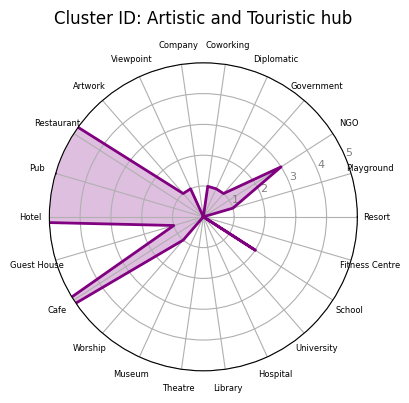

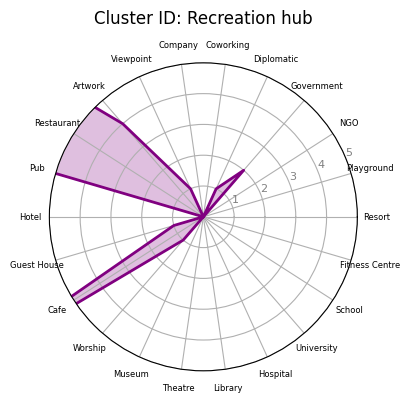

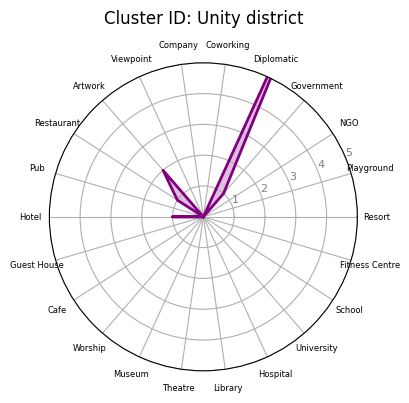

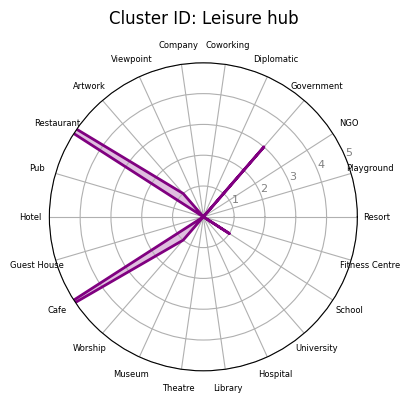

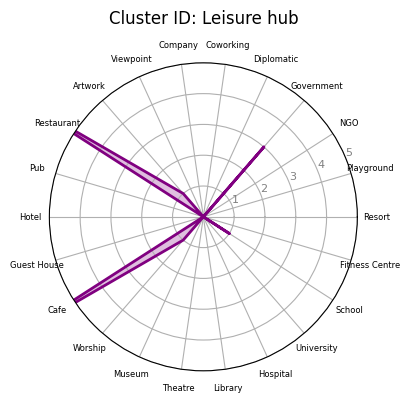

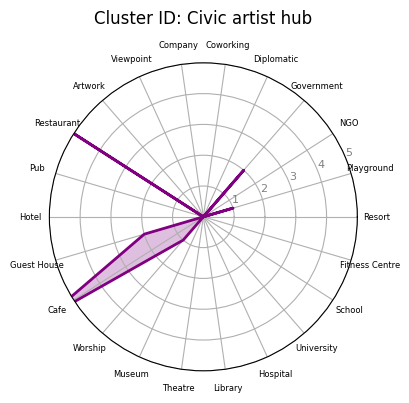

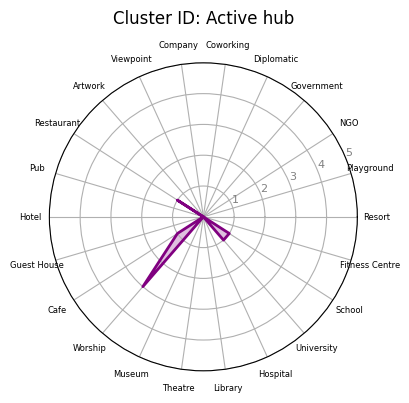

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import io
import base64
import folium

# Define the interventions for each Cluster ID
interventions = {
    'leisure hub': ['Public Recreation', 'Pocket Park', 'Food Truck'],
    'artistic and touristic hub': ['Public Park', 'Urban Farming', 'Theatre and Cultural Events', 'Seasonal Market', 'Artisanal Workshops'],
    'civic artist hub': ['Urban Farming', 'Artisan Workshop', 'Music Performance', 'Workshop', 'Comfortable Gathering Green Space'],
    'Active hub': ['Farming', 'Art Exhibition', 'Weekend Market', 'Live Music Performance'],
    'unity district': ['Urban Garden', 'Urban Farming', 'Entertainment Space', 'Outdoor Gym'],
    'recreation hub': ['Mobile Food Trucks', 'Pop-up Events', 'Art Installation']
}

benefits = {
    'public recreation': 'Public recreation on a neighborhood scale brings people together, improves physical and mental health, enhances safety, benefits the environment, boosts the local economy, provides educational opportunities, and ultimately enhances the overall quality of life for residents.',
    'pocket park': 'Pocket parks on a neighborhood scale offer numerous benefits. These small, accessible green spaces provide a place for residents to relax, socialize, and connect with nature. They promote physical activity, improve mental well-being, and contribute to a sense of community. Pocket parks also enhance the aesthetic appeal of the neighborhood, increase property values, and provide a haven of tranquility amidst urban settings. They bring nature closer to people, create opportunities for outdoor recreation, and contribute to a healthier, happier, and more vibrant neighborhood.',
    'food truck': 'Neighborhood food trucks provide convenient dining, support local businesses, foster community connections, offer diverse cuisine, promote sustainability, and add vibrancy to the area.',
    'public park': 'Neighborhood public parks offer numerous benefits. They provide a space for community gatherings, promote physical and mental well-being, enhance safety, contribute to a healthier environment, boost property values, offer educational opportunities, and overall improve the quality of life for residents.',
    'urban farming': 'Urban farming on a neighborhood scale offers multiple benefits. It provides access to fresh, locally grown produce, promotes sustainable food practices, enhances food security, beautifies the community, encourages physical activity, creates educational opportunities, fosters community engagement, and contributes to a greener and more resilient neighborhood.',
    'theatre and cultural events': 'Theater and cultural events on a neighborhood scale offer numerous benefits. They promote community engagement, foster a sense of belonging, celebrate diversity, provide entertainment and artistic experiences, support local talent, stimulate the local economy, enhance cultural understanding, and contribute to the overall vibrancy and liveliness of the neighborhood.',
    'seasonal market': 'Neighborhood seasonal markets bring fresh, local products, support local businesses, foster community connections, promote sustainability, stimulate the local economy, and enhance the neighborhood vibrancy.',
    'artisanal workshops': 'Artisanal workshops on a neighborhood scale offer several benefits. They provide opportunities for creativity and skill development, support local artisans and craftsmen, promote cultural preservation, encourage community participation, contribute to the local economy, and enhance the neighborhood\'s artistic and cultural richness.',
    'music performance': 'Music performances on a neighborhood scale offer numerous benefits. They bring joy and entertainment to the community, foster a sense of togetherness, showcase local talent, provide cultural enrichment, create social connections, stimulate the local economy, and contribute to the overall vibrancy and liveliness of the neighborhood.',
    'workshop': 'Workshops on a neighborhood scale offer various benefits. They provide opportunities for learning and skill development, foster community engagement, promote personal growth, encourage creativity, facilitate knowledge sharing, build social connections, and contribute to the overall well-being and empowerment of individuals in the neighborhood.',
    'farming': 'Neighborhood farming brings fresh produce, sustainability, community, physical activity, economic support, environmental benefits, and a closer connection to nature.',
    'art exhibition': 'Neighborhood art exhibitions inspire creativity, showcase local talent, foster community engagement, beautify the area, stimulate cultural appreciation, attract visitors, and contribute to the overall vibrancy of the community.',
    'weekend market': 'Neighborhood weekend markets support local vendors, foster community interaction, offer unique goods, boost the local economy, and promote sustainable shopping practices, creating a vibrant and proud community.',
    'live music performance': 'Enlivening atmosphere with live music performances.',
    'urban garden': 'Neighborhood urban gardens offer fresh produce, sustainability, community engagement, beauty, improved air quality, biodiversity, education, and a greener environment.',
    'entertainment space': 'Neighborhood entertainment spaces create community connections, support local events, enhance cultural appreciation, stimulate the local economy, and add vibrancy to the neighborhood.',
    'outdoor gym': 'Neighborhood outdoor gyms offer free exercise, promote fitness and well-being, foster community, improve mental health, and contribute to a healthier neighborhood.',
    'mobile food trucks': 'Diverse food options and culinary experiences.',
    'pop-up events': 'Neighborhood event pop-ups bring entertainment, social connections, economic support, local talent, and a vibrant atmosphere to the community.',
    'art installation': 'Visual art displays and interactive installations.'
}

spots_locations = poi_data[['Y', 'X', 'clusterID', 'Image Url']]

map = folium.Map(
    location=[33.8938, 35.5018],
    zoom_start=13,
    control_scale=True
)

# Add the cartodbdark_matter tile layer to the map
folium.TileLayer('cartodbdark_matter').add_to(map)

# Iterate over each row in the DataFrame
for index, location_info in poi_data.iterrows():
    cluster_id = location_info['clusterID']
    interventions_list = interventions.get(cluster_id.lower(), [])
    intervention_options_html = ''.join([f"<input type='radio' name='intervention_{index}' value='{intervention}' onclick='showContent(this, {index})'>{intervention}<br>" for intervention in interventions_list])

    # Generate the radar chart
    values = poi_data.loc[index, columns].values.astype(float)
    categories = columns

    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]
    ax.plot(angles, values, color='purple', linewidth=2)
    ax.fill(angles, values, color='purple', alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=6)
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels(["1", "2", "3", "4", "5"], color="grey", fontsize=8)
    ax.set_ylim(0, 5)
    ax.set_title(f'Cluster ID: {cluster_id}', size=12, color='black', y=1.1)
    ax.grid(True)

    # Save the chart image to a buffer
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png', dpi=80)
    buffer.seek(0)
    image_data = base64.b64encode(buffer.getvalue()).decode()

    # Generate the HTML for the popup
    html = f"""
    <style>
        /* CSS styles for the lettering */
        body {{
            font-family: 'Raleway', sans-serif;
            font-size: 14px;
        }}

        /* CSS styles for the title */
        .popup-title {{
            font-weight: bold;
        }}

        /* CSS styles for the rest of the text */
        .popup-content {{
            font-weight: normal;
        }}
    </style>
    <img src="{location_info['Image Url']}" alt="Image" width="350px">
    <b>Interventions:</b><br>
    {intervention_options_html}
    <br>
    <img src="data:image/png;base64,{image_data}" alt="Radar Chart">
    <br>
    <div id="intervention_{index}" style="visibility: hidden">
        <b class="popup-title">Intervention:</b>
        <p class="popup-content" style="font-size: 14px" id="intervention_text_{index}"></p>
    </div>
    <div id="benefits_{index}" style="visibility: hidden">
        <b class="popup-title">Benefits:</b>
        <p class="popup-content" style="font-size: 14px" id="benefits_text_{index}"></p>
    </div>

    <script>
    var benefits = {benefits};

    function showContent(intervention, index) {{
        var interventionDiv = document.getElementById("intervention_" + index);
        var benefitsDiv = document.getElementById("benefits_" + index);
        var benefitsText = document.getElementById("benefits_text_" + index);

        if (intervention.checked) {{
            interventionDiv.style.visibility = 'visible';
            benefitsDiv.style.visibility = 'visible';
            document.getElementById("intervention_text_" + index).innerHTML = "<b>Intervention:</b> " + intervention.value;
            benefitsText.innerHTML = "<b>Benefits:</b> " + benefits[intervention.value.toLowerCase()];
        }} else {{
            interventionDiv.style.visibility = 'hidden';
            benefitsDiv.style.visibility = 'hidden';
        }}
    }}
    </script>
    """

    iframe = folium.IFrame(html=html, width=500, height=550)
    popup = folium.Popup(iframe, max_width=700)

    folium.Marker(
        [location_info['Y'], location_info['X']],
        popup=popup,
        icon=folium.Icon(color='purple')
    ).add_to(map)

# Create JavaScript function to display intervention benefits on selection
js_code = """
    <script>
    function showContent(element, index) {
        var benefitsDiv = document.getElementById('benefits_' + index);
        benefitsDiv.innerText = getBenefits(element.value);
        var contentDiv = document.getElementById('content_' + index);
        if (element.checked) {
            contentDiv.style.display = 'block';
        } else {
            contentDiv.style.display = 'none';
        }
    }
    function getBenefits(intervention) {
        switch (intervention) {
            case 'Public Recreation':
                return `{benefits['public recreation']}`;
            case 'Pocket Park':
                return `{benefits['pocket park']}`;
            case 'Food Truck':
                return `{benefits['food truck']}`;
            case 'Public Park':
                return `{benefits['public park']}`;
            case 'Urban Farming':
                return `{benefits['urban farming']}`;
            case 'Theatre and Cultural Events':
                return `{benefits['theatre and cultural events']}`;
            case 'Seasonal Market':
                return `{benefits['seasonal market']}`;
            case 'Artisanal Workshops':
                return `{benefits['artisanal workshops']}`;
            case 'Music Performance':
                return `{benefits['music performance']}`;
            case 'Workshop':
                return `{benefits['workshop']}`;
            case 'Farming':
                return `{benefits['farming']}`;
            case 'Art Exhibition':
                return `{benefits['art exhibition']}`;
            case 'Weekend Market':
                return `{benefits['weekend market']}`;
            case 'Live Music Performance':
                return `{benefits['live music performance']}`;
            case 'Urban Garden':
                return `{benefits['urban garden']}`;
            case 'Entertainment Space':
                return `{benefits['entertainment space']}`;
            case 'Outdoor Gym':
                return `{benefits['outdoor gym']}`;
            case 'Mobile Food Trucks':
                return `{benefits['mobile food trucks']}`;
            case 'Pop-up Events':
                return `{benefits['pop-up events']}`;
            case 'Art Installation':
                return `{benefits['art installation']}`;
            default:
                return '';
        }
    }
    </script>
"""

# Add the JavaScript code to the map
map.get_root().html.add_child(folium.Element(js_code))

# Display the map
map


import midjourney

In [ ]:
!pip install midjourney


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from midjourney import MidJourneyImage


ImportError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import io
import base64
import folium
import midjourney
from PIL import Image
import requests
from io import BytesIO



# Define the interventions for each Cluster ID
interventions = {
    'leisure hub': ['Public Recreation', 'Pocket Park', 'Food Truck'],
    'artistic and touristic hub': ['Public Park', 'Urban Farming', 'Theatre and Cultural Events', 'Seasonal Market', 'Artisanal Workshops'],
    'civic artist hub': ['Urban Farming', 'Artisan Workshop', 'Music Performance', 'Workshop', 'Comfortable Gathering Green Space'],
    'Active hub': ['Farming', 'Art Exhibition', 'Weekend Market', 'Live Music Performance'],
    'unity district': ['Urban Garden', 'Urban Farming', 'Entertainment Space', 'Outdoor Gym'],
    'recreation hub': ['Mobile Food Trucks', 'Pop-up Events', 'Art Installation']
}

benefits = {
    'public recreation': 'Public recreation on a neighborhood scale brings people together, improves physical and mental health, enhances safety, benefits the environment, boosts the local economy, provides educational opportunities, and ultimately enhances the overall quality of life for residents.',
    'pocket park': 'Pocket parks on a neighborhood scale offer numerous benefits. These small, accessible green spaces provide a place for residents to relax, socialize, and connect with nature. They promote physical activity, improve mental well-being, and contribute to a sense of community. Pocket parks also enhance the aesthetic appeal of the neighborhood, increase property values, and provide a haven of tranquility amidst urban settings. They bring nature closer to people, create opportunities for outdoor recreation, and contribute to a healthier, happier, and more vibrant neighborhood.',
    'food truck': 'Neighborhood food trucks provide convenient dining, support local businesses, foster community connections, offer diverse cuisine, promote sustainability, and add vibrancy to the area.',
    'public park': 'Neighborhood public parks offer numerous benefits. They provide a space for community gatherings, promote physical and mental well-being, enhance safety, contribute to a healthier environment, boost property values, offer educational opportunities, and overall improve the quality of life for residents.',
    'urban farming': 'Urban farming on a neighborhood scale offers multiple benefits. It provides access to fresh, locally grown produce, promotes sustainable food practices, enhances food security, beautifies the community, encourages physical activity, creates educational opportunities, fosters community engagement, and contributes to a greener and more resilient neighborhood.',
    'theatre and cultural events': 'Theater and cultural events on a neighborhood scale offer numerous benefits. They promote community engagement, foster a sense of belonging, celebrate diversity, provide entertainment and artistic experiences, support local talent, stimulate the local economy, enhance cultural understanding, and contribute to the overall vibrancy and liveliness of the neighborhood.',
    'seasonal market': 'Neighborhood seasonal markets bring fresh, local products, support local businesses, foster community connections, promote sustainability, stimulate the local economy, and enhance the neighborhood vibrancy.',
    'artisanal workshops': 'Artisanal workshops on a neighborhood scale offer several benefits. They provide opportunities for creativity and skill development, support local artisans and craftsmen, promote cultural preservation, encourage community participation, contribute to the local economy, and enhance the neighborhood\'s artistic and cultural richness.',
    'music performance': 'Music performances on a neighborhood scale offer numerous benefits. They bring joy and entertainment to the community, foster a sense of togetherness, showcase local talent, provide cultural enrichment, create social connections, stimulate the local economy, and contribute to the overall vibrancy and liveliness of the neighborhood.',
    'workshop': 'Workshops on a neighborhood scale offer various benefits. They provide opportunities for learning and skill development, foster community engagement, promote personal growth, encourage creativity, facilitate knowledge sharing, build social connections, and contribute to the overall well-being and empowerment of individuals in the neighborhood.',
    'farming': 'Neighborhood farming brings fresh produce, sustainability, community, physical activity, economic support, environmental benefits, and a closer connection to nature.',
    'art exhibition': 'Neighborhood art exhibitions inspire creativity, showcase local talent, foster community engagement, beautify the area, stimulate cultural appreciation, attract visitors, and contribute to the overall vibrancy of the community.',
    'weekend market': 'Neighborhood weekend markets support local vendors, foster community interaction, offer unique goods, boost the local economy, and promote sustainable shopping practices, creating a vibrant and proud community.',
    'live music performance': 'Enlivening atmosphere with live music performances.',
    'urban garden': 'Neighborhood urban gardens offer fresh produce, sustainability, community engagement, beauty, improved air quality, biodiversity, education, and a greener environment.',
    'entertainment space': 'Neighborhood entertainment spaces create community connections, support local events, enhance cultural appreciation, stimulate the local economy, and add vibrancy to the neighborhood.',
    'outdoor gym': 'Neighborhood outdoor gyms offer free exercise, promote fitness and well-being, foster community, improve mental health, and contribute to a healthier neighborhood.',
    'mobile food trucks': 'Diverse food options and culinary experiences.',
    'pop-up events': 'Neighborhood event pop-ups bring entertainment, social connections, economic support, local talent, and a vibrant atmosphere to the community.',
    'art installation': 'Visual art displays and interactive installations.'
}

# Function to display the interventions and their benefits
def display_interventions(interventions, benefits):
    for cluster, intervention_list in interventions.items():
        print(f"Cluster: {cluster}")
        print("Interventions:")
        for intervention in intervention_list:
            print(f"- {intervention}")
            print("Benefits:")
            print(benefits.get(intervention.lower(), "No benefits found."))
            print()
        print()

# Call the function to display interventions and benefits
display_interventions(interventions, benefits)

spots_locations = poi_data[['Y', 'X', 'clusterID', 'Image Url']]

map = folium.Map(
    location=[33.8938, 35.5018],
    zoom_start=13,
    control_scale=True
)


#update_images
def generate_updated_image(intervention, image_url):
    # Get the benefits of the selected intervention
    intervention_benefits = benefits.get(intervention.lower(), "No benefits found.")

    # Generate the updated image using Midjourney
    image = Image.open(BytesIO(requests.get(image_url).content))
    updated_image = midjourney.apply_effects(image, benefits=intervention_benefits)

    return updated_image



# Add the cartodbdark_matter tile layer to the map
folium.TileLayer('cartodbdark_matter').add_to(map)

# Iterate over each row in the DataFrame
for index, location_info in poi_data.iterrows():
    cluster_id = location_info['clusterID']
    interventions_list = interventions.get(cluster_id.lower(), [])
    intervention_options_html = ''.join([f"<input type='radio' name='intervention_{index}' value='{intervention}' onclick='showContent(this, {index})'>{intervention}<br>" for intervention in interventions_list])

    # Generate the radar chart
    values = poi_data.loc[index, columns].values.astype(float)
    categories = columns

    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]
    ax.plot(angles, values, color='purple', linewidth=2)
    ax.fill(angles, values, color='purple', alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=6)
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels(["1", "2", "3", "4", "5"], color="grey", fontsize=8)
    ax.set_ylim(0, 5)
    ax.set_title(f'Cluster ID: {cluster_id}', size=12, color='black', y=1.1)
    ax.grid(True)

    # Save the chart image to a buffer
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png', dpi=80)
    buffer.seek(0)
    image_data = base64.b64encode(buffer.getvalue()).decode()


    # Generate the HTML for the popup
    intervention_options_html = ''.join([f"<option value='{intervention}'>{intervention}</option>" for intervention in interventions_list])

    html = f"""
    <style>
        /* CSS styles for the lettering */
        body {{
            font-family: 'Raleway', sans-serif;
            font-size: 14px;
        }}

        /* CSS styles for the title */
        .popup-title {{
            font-weight: bold;
        }}

        /* CSS styles for the rest of the text */
        .popup-content {{
            font-weight: normal;
        }}
    </style>
    <img src="{location_info['Image Url']}" alt="Image" width="350px">
    <b>Interventions:</b><br>
    <select id="intervention_{index}" onchange="showContent(this, {index})">
        <option value="">Select an intervention</option>
        {intervention_options_html}
    </select>
    <br>
    <img src="data:image/png;base64,{image_data}" alt="Radar Chart">
    <br>
    <div id="content_{index}" style="display: none">
        <b class="popup-title">Intervention:</b>
        <p class="popup-content" style="font-size: 14px" id="intervention_text_{index}"></p>
        <b class="popup-title">Benefits:</b>
        <p class="popup-content" style="font-size: 14px" id="benefits_text_{index}"></p>
        <img src="" alt="Updated Image" id="updated_image_{index}" width="350px">
    </div>

    <script>
    function showContent(element, index) {
        var interventionDiv = document.getElementById("intervention_text_" + index);
        var benefitsDiv = document.getElementById("benefits_text_" + index);
        var updatedImage = document.getElementById("updated_image_" + index);

        if (element.value) {
            interventionDiv.innerText = element.value;
            benefitsDiv.innerText = getBenefits(element.value);
            updatedImage.src = generateUpdatedImage(element.value, "{location_info['Image Url']}").src;
            document.getElementById("content_" + index).style.display = 'block';
        } else {
            document.getElementById("content_" + index).style.display = 'none';
        }
    }
    function getBenefits(intervention) {

        switch (intervention) {
            case 'Public Recreation':
                return "{benefits['public recreation']}";
            case 'Pocket Park':
                return "{benefits['pocket park']}";
            case 'Food Truck':
                return "{benefits['food truck']}";
            // Add cases for other interventions
            default:
                return "No benefits found.";
        }
    }

        // Benefits mapping code here
    }
    function generateUpdatedImage(intervention, imageUrl) {
    google.colab.kernel.invokeFunction('generate_updated_image', [intervention, imageUrl], {})
        .then(function(result) {
            var updatedImage = result.data['application/json'][0];
            document.getElementById("updated_image_" + index).src = updatedImage;
        });
}

        // Image generation code here
    }
    </script>
    """

# Add the HTML to the map marker
folium.Marker(
    location=(location_info['Latitude'], location_info['Longitude']),
    popup=folium.Popup(html, max_width=500)
).add_to(map_beirut)


    iframe = folium.IFrame(html=html, width=500, height=550)
    popup = folium.Popup(iframe, max_width=700)

    folium.Marker(
        [location_info['Y'], location_info['X']],
        popup=popup,
        icon=folium.Icon(color='purple')
    ).add_to(map)

# Create JavaScript function to display intervention benefits on selection
js_code = """
    <script>
    function showContent(element, index) {
        var benefitsDiv = document.getElementById('benefits_' + index);
        benefitsDiv.innerText = getBenefits(element.value);
        var contentDiv = document.getElementById('content_' + index);
        if (element.checked) {
            contentDiv.style.display = 'block';
        } else {
            contentDiv.style.display = 'none';
        }
    }
    function getBenefits(intervention) {
        switch (intervention) {
            case 'Public Recreation':
                return `{benefits['public recreation']}`;
            case 'Pocket Park':
                return `{benefits['pocket park']}`;
            case 'Food Truck':
                return `{benefits['food truck']}`;
            case 'Public Park':
                return `{benefits['public park']}`;
            case 'Urban Farming':
                return `{benefits['urban farming']}`;
            case 'Theatre and Cultural Events':
                return `{benefits['theatre and cultural events']}`;
            case 'Seasonal Market':
                return `{benefits['seasonal market']}`;
            case 'Artisanal Workshops':
                return `{benefits['artisanal workshops']}`;
            case 'Music Performance':
                return `{benefits['music performance']}`;
            case 'Workshop':
                return `{benefits['workshop']}`;
            case 'Farming':
                return `{benefits['farming']}`;
            case 'Art Exhibition':
                return `{benefits['art exhibition']}`;
            case 'Weekend Market':
                return `{benefits['weekend market']}`;
            case 'Live Music Performance':
                return `{benefits['live music performance']}`;
            case 'Urban Garden':
                return `{benefits['urban garden']}`;
            case 'Entertainment Space':
                return `{benefits['entertainment space']}`;
            case 'Outdoor Gym':
                return `{benefits['outdoor gym']}`;
            case 'Mobile Food Trucks':
                return `{benefits['mobile food trucks']}`;
            case 'Pop-up Events':
                return `{benefits['pop-up events']}`;
            case 'Art Installation':
                return `{benefits['art installation']}`;
            default:
                return '';
        }
    }
    </script>
"""


# Add the JavaScript code to the map
map.get_root().html.add_child(folium.Element(js_code))

# Display the map
map






SyntaxError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import io
import base64
import folium
from PIL import Image
import requests
from io import BytesIO


# Define the interventions for each Cluster ID
interventions = {
    'leisure hub': ['Public Recreation', 'Pocket Park', 'Food Truck'],
    'artistic and touristic hub': ['Public Park', 'Urban Farming', 'Theatre and Cultural Events', 'Seasonal Market', 'Artisanal Workshops'],
    'civic artist hub': ['Urban Farming', 'Artisanal Workshops', 'Music Performance', 'Workshop', 'Comfortable Gathering Green Space'],
    'Active hub': ['Farming', 'Art Exhibition', 'Weekend Market', 'Live Music Performance'],
    'unity district': ['Urban Garden', 'Urban Farming', 'Entertainment Space', 'Outdoor Gym'],
    'recreation hub': ['Mobile Food Trucks', 'Pop-up Events', 'Art Installation']
}

benefits = {
    'public recreation': 'Public recreation on a neighborhood scale brings people together, improves physical and mental health, enhances safety, benefits the environment, boosts the local economy, provides educational opportunities, and ultimately enhances the overall quality of life for residents.',
    'pocket park': 'Pocket parks on a neighborhood scale offer numerous benefits. These small, accessible green spaces provide a place for residents to relax, socialize, and connect with nature. They promote physical activity, improve mental well-being, and contribute to a sense of community. Pocket parks also enhance the aesthetic appeal of the neighborhood, increase property values, and provide a haven of tranquility amidst urban settings. They bring nature closer to people, create opportunities for outdoor recreation, and contribute to a healthier, happier, and more vibrant neighborhood.',
    'food truck': 'Neighborhood food trucks provide convenient dining, support local businesses, foster community connections, offer diverse cuisine, promote sustainability, and add vibrancy to the area.',
    'public park': 'Neighborhood public parks offer numerous benefits. They provide a space for community gatherings, promote physical and mental well-being, enhance safety, contribute to a healthier environment, boost property values, offer educational opportunities, and overall improve the quality of life for residents.',
    'urban farming': 'Urban farming on a neighborhood scale offers multiple benefits. It provides access to fresh, locally grown produce, promotes sustainable food practices, enhances food security, beautifies the community, encourages physical activity, creates educational opportunities, fosters community engagement, and contributes to a greener and more resilient neighborhood.',
    'theatre and cultural events': 'Theater and cultural events on a neighborhood scale offer numerous benefits. They promote community engagement, foster a sense of belonging, celebrate diversity, provide entertainment and artistic experiences, support local talent, stimulate the local economy, enhance cultural understanding, and contribute to the overall vibrancy and liveliness of the neighborhood.',
    'seasonal market': 'Neighborhood seasonal markets bring fresh, local products, support local businesses, foster community connections, promote sustainability, stimulate the local economy, and enhance the neighborhood vibrancy.',
    'artisanal workshops': 'Artisanal workshops on a neighborhood scale offer several benefits. They provide opportunities for creativity and skill development, support local artisans and craftsmen, promote cultural preservation, encourage community participation, contribute to the local economy, and enhance the neighborhood\'s artistic and cultural richness.',
    'music performance': 'Music performances on a neighborhood scale offer numerous benefits. They bring joy and entertainment to the community, foster a sense of togetherness, showcase local talent, provide cultural enrichment, create social connections, stimulate the local economy, and contribute to the overall vibrancy and liveliness of the neighborhood.',
    'workshop': 'Neighborhood workshops offer educational and skill development opportunities, promote community engagement, encourage creativity, foster a sense of belonging, and contribute to the overall well-being and development of residents.',
    'comfortable gathering green space': 'Comfortable gathering green spaces in neighborhoods provide inviting and inclusive areas for people to gather, socialize, and relax. They foster a sense of community, promote social interactions, enhance well-being, and contribute to the overall livability of the neighborhood.',
    'farming': 'Farming activities on a neighborhood scale offer several benefits. They provide access to fresh produce, promote sustainable food practices, enhance food security, create educational opportunities, beautify the community, encourage physical activity, and contribute to a greener and more resilient neighborhood.',
    'art exhibition': 'Art exhibitions on a neighborhood scale offer numerous benefits. They provide cultural enrichment, foster community engagement, support local artists, stimulate the local economy, promote creativity and artistic expression, and contribute to the overall vibrancy and liveliness of the neighborhood.',
    'weekend market': 'Weekend markets on a neighborhood scale offer multiple benefits. They bring fresh, local products, support local businesses, foster community connections, promote sustainability, stimulate the local economy, and enhance the neighborhood vibrancy.',
    'live music performance': 'Live music performances on a neighborhood scale bring joy and entertainment to the community, foster a sense of togetherness, showcase local talent, provide cultural enrichment, create social connections, stimulate the local economy, and contribute to the overall vibrancy and liveliness of the neighborhood.',
    'urban garden': 'Urban gardens on a neighborhood scale offer several benefits. They provide access to fresh produce, promote sustainable food practices, enhance food security, beautify the community, encourage physical activity, create educational opportunities, foster community engagement, and contribute to a greener and more resilient neighborhood.',
    'entertainment space': 'Neighborhood entertainment spaces offer numerous benefits. They provide a venue for community events, promote social interactions, foster a sense of belonging, support local talent, stimulate the local economy, enhance cultural understanding, and contribute to the overall vibrancy and liveliness of the neighborhood.',
    'outdoor gym': 'Outdoor gyms on a neighborhood scale offer several benefits. They provide free access to exercise equipment, promote physical activity, enhance well-being, encourage social interactions, contribute to a healthier community, and create opportunities for outdoor recreation.',
    'mobile food trucks': 'Mobile food trucks in neighborhoods provide convenient dining options, support local businesses, foster community connections, offer diverse cuisine, promote sustainability, and add vibrancy to the area.',
    'pop-up events': 'Pop-up events in neighborhoods bring unique and temporary experiences, foster community engagement, offer cultural enrichment, support local businesses, stimulate the local economy, and contribute to the overall vibrancy and liveliness of the neighborhood.',
    'art installation': 'Art installations in neighborhoods offer numerous benefits. They bring beauty and creativity to public spaces, foster community engagement, stimulate dialogue and reflection, enhance the aesthetic appeal of the area, support local artists, and contribute to the overall vibrancy and liveliness of the neighborhood.'
}

# Create a map centered on New York City
m = folium.Map(location=[33.8938, 35.5018], zoom_start=12)

# Define a function to generate the HTML and JavaScript for the popup
def generate_popup(cluster_id, interventions):
    html = '''
    <h3>Cluster ID: {0}</h3>
    <p>Interventions:</p>
    <ul>
    '''.format(cluster_id)

    for intervention in interventions:
        html += '<li>{}</li>'.format(intervention.capitalize())

    html += '''
    </ul>
    <p>Benefits:</p>
    <ul>
    '''

    for intervention in interventions:
        html += '<li>{}</li>'.format(benefits[intervention.lower()])

    html += '</ul>'

    return folium.Html(html, script=True)

# Add markers for each cluster
for cluster_id, intervention_list in interventions.items():
    folium.Marker(
        location=[33.8938, 35.5018],  # Replace with the actual location of the cluster
        popup=folium.Popup(generate_popup(cluster_id, intervention_list), max_width=500),
        icon=folium.Icon(icon='cloud')
    ).add_to(m)

# Save the map to a BytesIO object
map_buffer = BytesIO()
m.save(map_buffer, close_file=False)


spots_locations = poi_data[['Y', 'X', 'clusterID', 'Image Url']]


# Fetch the image from the URL
response = requests.get('Image Url')
image_data = response.content


# Create an Image object from the BytesIO buffer
map_image = Image.open(BytesIO(image_data))

# Save the image to a BytesIO object
image_buffer = BytesIO()
map_image.save(image_buffer, format='PNG')
image_buffer.seek(0)

# Encode the image as base64
encoded_image = base64.b64encode(image_buffer.getvalue()).decode()

# Display the encoded image
plt.figure(figsize=(8, 8))
plt.imshow(Image.open(BytesIO(base64.b64decode(encoded_image))))
plt.axis('off')
plt.show()


MissingSchema: ignored

with

In [ ]:
!pip install init
!pip install gradio
!pip install leafmap
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


map app

In [ ]:
import gradio as gr
import folium
from folium import features
from folium.raster_layers import ImageOverlay

def visualize_map(latitude, longitude, plot_image_url, plot_description):
    # Create a map centered at the given latitude and longitude
    map = folium.Map(location=[latitude, longitude], zoom_start=12)

    # Add a marker at the given location
    folium.Marker([latitude, longitude], popup='Marker').add_to(map)

    # Add an image overlay to the map
    image_bounds = [[latitude - 0.01, longitude - 0.01], [latitude + 0.01, longitude + 0.01]]
    image_overlay = ImageOverlay(plot_image_url, image_bounds, opacity=0.6)
    image_overlay.add_to(map)

    # Convert the map to HTML string
    map_html = map.get_root().render()

    # Create the description HTML
    description_html = f'<h2>Plot Description:</h2><p>{plot_description}</p>'

    # Return the map HTML and the description HTML
    return map_html, description_html


# Define the input components
latitude_input = gr.inputs.Number(label="Latitude")
longitude_input = gr.inputs.Number(label="Longitude")
plot_image_input = gr.inputs.Textbox(label="Plot Image URL")
plot_description_input = gr.inputs.Textbox(label="Plot Description")

# Define the output components
map_output = gr.outputs.HTML()
description_output = gr.outputs.HTML()

# Create the interface
gr.Interface(
    fn=visualize_map,
    inputs=[latitude_input, longitude_input, plot_image_input, plot_description_input],
    outputs=[map_output, description_output]
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ed7f337aceb9eb420d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
